## Waste Management Using CNN Model

In [51]:
#pip install opencv-python
import numpy as np #numpy: For numerical operations and arrays.
import pandas as pd #pandas: For managing data in tabular form (DataFrame).
import tensorflow as tf
import matplotlib.pyplot as plt #matplotlib.pyplot: For data visualization (e.g., pie charts, image plots).
import cv2  #cv2: OpenCV library for image processing.
from tqdm import tqdm #tqdm: For displaying a progress bar during loops.
import warnings #warnings: To suppress unnecessary warnings.
import os # os: For interacting with the operating system, such as directory paths.
# Suppress warnings
warnings.filterwarnings('ignore')

Defining File Paths

In [2]:
train_path = r"C:\Users\hbsru\OneDrive\Pictures\Documents\personal\projects\waste classification\dataset\TRAIN"
test_path = r"C:\Users\hbsru\OneDrive\Pictures\Documents\personal\projects\waste classification\dataset\TEST"


TensorFlow and Image Processing Imports

In [3]:
# TensorFlow components are used for defining and building the Convolutional Neural Network (CNN).
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

# ImageDataGenerator: For data augmentation and preprocessing.
# glob: For pattern matching filenames, used to fetch all files in a directory

In [4]:
# Visualization
from cv2 import cvtColor

# Initialize data containers
x_data = []  # Stores image data as numpy arrays.
y_data = []  # Stores corresponding labels.

# Load and preprocess images
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert to RGB
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])  # Use os.path.sep for cross-platform compatibility

# Create DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})


100%|██████████| 9999/9999 [00:16<00:00, 623.93it/s]


In [5]:
# Check data shape
print(data.shape)  # Ensure the shape is correct

(22564, 2)


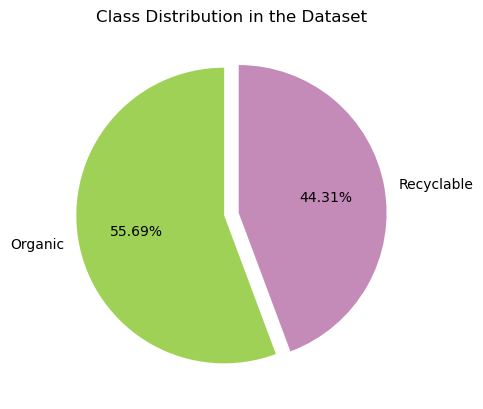

In [6]:
# Plot pie chart for class distribution
colors = ['#a0d157', '#c48bb8']  # Custom colors for the chart
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05, 0.05])
plt.title("Class Distribution in the Dataset")
plt.show()

 Displaying Random Images from the Dataset

* This code randomly selects 9 images from a dataset containing 15,000 images.
* The image is displayed along with its label.

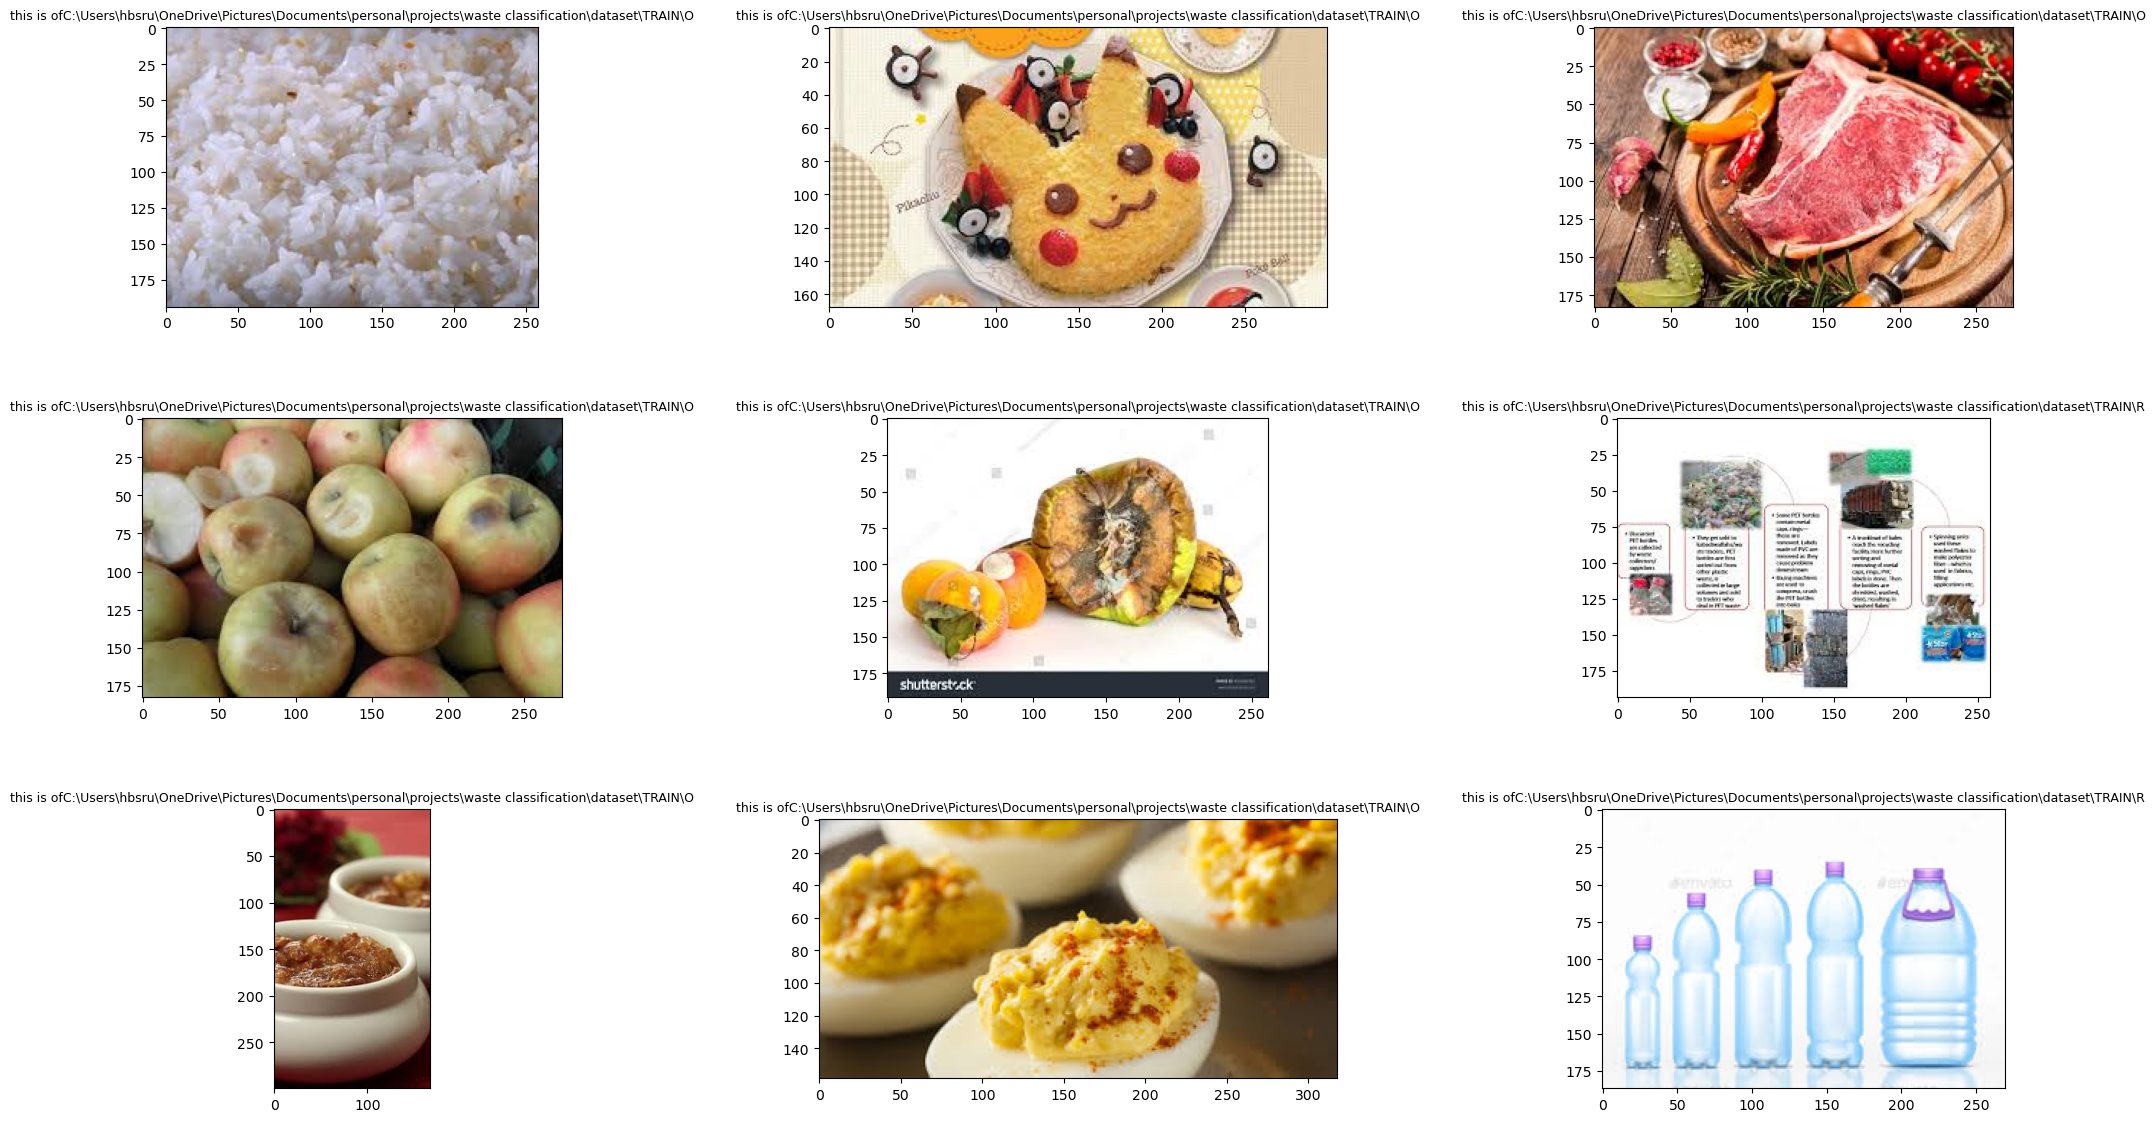

In [7]:
plt.figure(figsize=(20,15)) # Create a figure with a size of 20x15 inches
for i in range(9): # Loop to display 9 random images
    plt.subplot(4,3,(i%12)+1) # Create a subplot (4 rows, 3 columns)
    index = np.random.randint(15000) # Select a random index from the dataset (assuming 15,000 images)
    plt.title('this is of{0}'.format(data.label[index]),fontsize=9) # Set the title with the label of the selected image
    plt.imshow(data.image[index])  # Display the image using imshow()
    plt.tight_layout()  # Adjust the layout to prevent overlapping
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

CNN-Convolutional Neural Network

note: 
* non-linearity : In deep learning, non-linearity means that the model can learn complex patterns rather than just straight-line relationships.
* If we set Dropout(0.5), 50% of neurons in that layer will be randomly ignored during each training step.
* The loss function tells the model how wrong its predictions are.

 Plotting Accuracy Curves

* This plots the accuracy of the model over the training epochs.
* hist.history['accuracy'] contains accuracy values for each epoch during training.
* hist.history['val_accuracy'] contains validation accuracy values.

Plotting Loss Curves

A decreasing loss indicates that the model is learning.

Defining a Prediction Function

* This function takes an image, processes it, and predicts whether it's Recyclable Waste or Organic Waste.
* It resizes the image to 224x224, reshapes it into batch format ([-1,224,224,3]), and feeds it to the trained model.
* The predicted class is determined using np.argmax(), which returns the index of the highest probability.
* The function then prints the category based on the predicted index.

In [ ]:
# This initializes a Sequential model, meaning layers will be added one after another in a sequential manner.
model = Sequential()
# Conv2D(32, (3,3)): A convolutional layer with 32 filters, each of size 3x3.
# input_shape=(224,224,3): Specifies that input images have a size of 224x224 pixels with 3 color channels (RGB).
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu')) #Activation('relu'): Applies the ReLU (Rectified Linear Unit) activation function to introduce non-linearity.
model.add(MaxPooling2D()) #: Applies max pooling (default pool size = (2,2)) to reduce the spatial dimensions, making the model computationally efficient.

model.add(Conv2D(64,(3,3))) #Increases the number of filters to 64 for detecting more complex patterns.
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3))) #Uses 128 filters to capture even higher-level features.
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #Converts the 2D feature maps into a 1D vector to feed into fully connected layers.

model.add(Dense(256)) #A fully connected layer with 256 neurons.
model.add(Activation('relu'))
model.add(Dropout(0.5)) ##Dropout(0.5): Prevents overfitting by randomly setting 50% of the neurons to zero during training.
model.add(Dense(64)) #Another dense layer with 64 neurons.
model.add(Activation('relu'))
model.add(Dropout(0.5)) #Dropout(0.5): Prevents overfitting by randomly setting 50% of the neurons to zero during training.

model.add(Dense(2)) #A dense layer with 2 neurons for binary classification.
model.add(Activation('softmax'))#Softmax activation is used

#loss="binary_crossentropy": Since we are dealing with binary classification, binary cross-entropy is used.
#Batch size = 64: The model will process 64 images per batch during training.
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
batch_size = 64 #Compute the loss and update the weights after every 64 images.


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

ImageDataGenerator : is a class in Keras that automatically loads, processes, and augments images in real-time during training.
It helps prevent overfitting by applying transformations to images.

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255) #dividing each pixel by 255.

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# flow_from_directory():It automatically loads images from a directory structure and prepares them for training/testing & It assigns labels to images based on folder names.
train_generator = train_datagen.flow_from_directory(
    train_path, #Path to the training data folder.
    target_size = (224,224), #Resizes images to 224x224 pixels (needed for models like VGG16, ResNet, etc.).
    batch_size = batch_size, #Number of images loaded per batch (batch_size = 64).
    color_mode = "rgb",
    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode="categorical")

#hist = model.fit(
   # train_generator,
   # epochs=10,
   # validation_data=test_generator)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


Training the Model

* The model is trained using train_generator and validated using    test_generator.
* epochs=15 means the model will train for 15 iterations over the dataset.
* The training history (loss, accuracy) is stored in hist.

In [14]:
hist = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator)

Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 553s 2s/step - accuracy: 0.7772 - loss: 0.5147 - val_accuracy: 0.8906 - val_loss: 0.2837
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 515s 1s/step - accuracy: 0.8472 - loss: 0.3768 - val_accuracy: 0.8850 - val_loss: 0.3035
Epoch 3/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.8686 - loss: 0.3348 - val_accuracy: 0.9009 - val_loss: 0.2636
Epoch 4/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.8703 - loss: 0.3303 - val_accuracy: 0.8754 - val_loss: 0.3055
Epoch 5/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 574s 2s/step - accuracy: 0.8921 - loss: 0.2774 - val_accuracy: 0.9117 - val_loss: 0.2421
Epoch 6/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 569s 2s/step - accuracy: 0.9024 - loss: 0.2541 - val_accuracy: 0.9136 - val_loss: 0.2531
Epoch 7/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.9269 - loss: 0.1989 - val_accuracy: 0.9144 - val_loss: 0.2771
Epoch 8/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 573s 2s/step - accuracy: 0.9431 - loss: 0.1604 - val_accu

 Plotting Accuracy Curves

* This plots the accuracy of the model over the training epochs.
* hist.history['accuracy'] contains accuracy values for each epoch during training.
* hist.history['val_accuracy'] contains validation accuracy values.

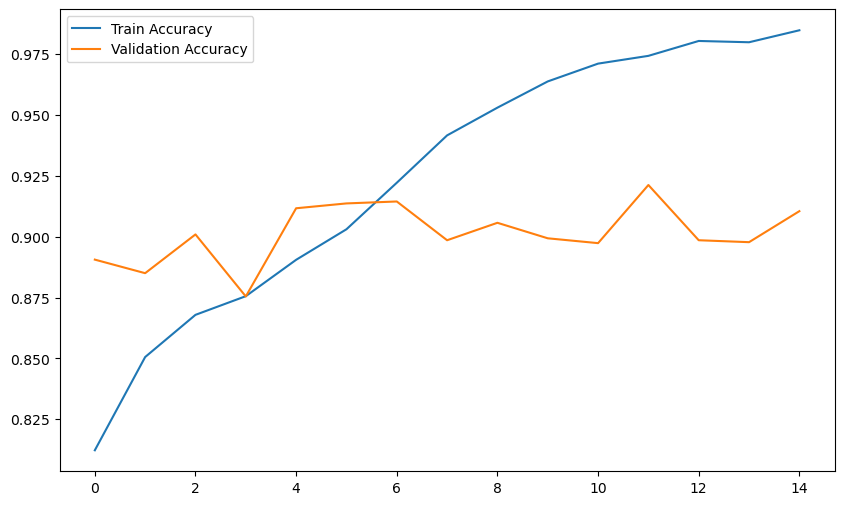

In [15]:
plt.figure(figsize=(10,6)) # Create a figure of size 10x6 inches
plt.plot(hist.history['accuracy'],label='Train Accuracy') # Plot training accuracy over epochs
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy') # Plot validation accuracy over epochs
plt.legend() # Add a legend to differentiate the two lines
plt.show()


Plotting Loss Curves

A decreasing loss indicates that the model is learning.

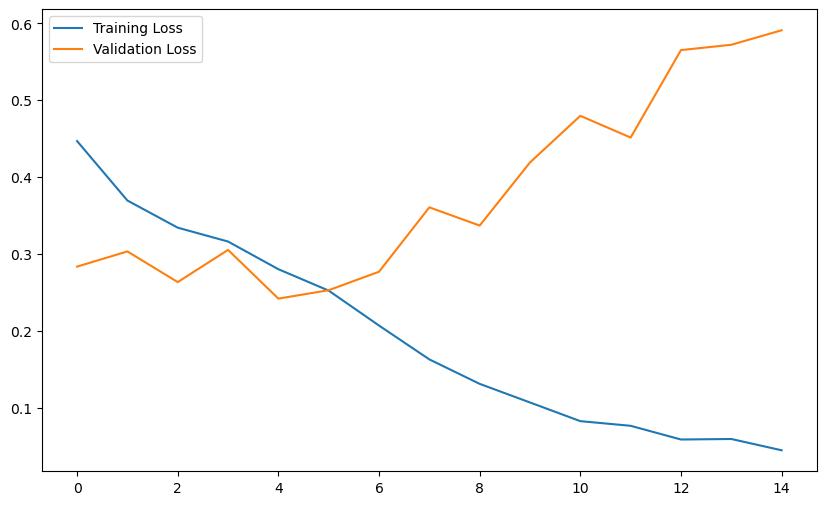

In [16]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='Training Loss')  # Plot training loss over epochs
plt.plot(hist.history['val_loss'],label='Validation Loss')  # Plot validation loss over epochs
plt.legend()
plt.show()

Defining a Prediction Function

* This function takes an image, processes it, and predicts whether it's Recyclable Waste or Organic Waste.
* It resizes the image to 224x224, reshapes it into batch format ([-1,224,224,3]), and feeds it to the trained model.
* The predicted class is determined using np.argmax(), which returns the index of the highest probability.
* The function then prints the category based on the predicted index.

In [42]:
def predict_fun(img):
    # if img is None:
    #     print("Error: Unable to load image. Check the file path.")
    #     return
    plt.figure(figsize=(6,4))  # Create a figure for displaying the image
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # Convert BGR (OpenCV format) to RGB for correct display
    plt.tight_layout() # Adjust layout
    img = cv2.resize(img,(224,224)) # Resize the image to 224x224 pixels (model input size)
    img = np.reshape(img,[-1,224,224,3])  # Reshape it into a batch format
    result = np.argmax(model.predict(img),axis=1) # Get the predicted class with the highest probability
    if result == 0:
        print("The image shown is Recyclable Waste")
    elif result == 1:
        print("The image shown is Organic Waste")
    



Running Predictions on Test Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The image shown is Organic Waste


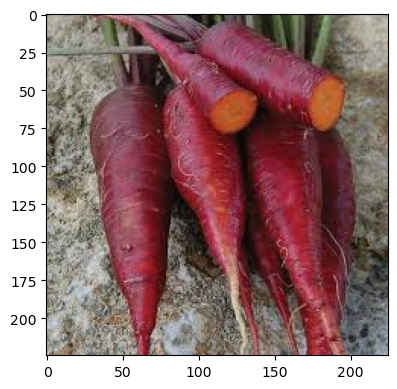

In [46]:
test_img = cv2.imread(r"C:\Users\hbsru\OneDrive\Pictures\Documents\personal\projects\waste classification\dataset\TEST\O\O_12571.jpg")
predict_fun(test_img) # Calls predict_fun() to classify and display each test image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The image shown is Recyclable Waste


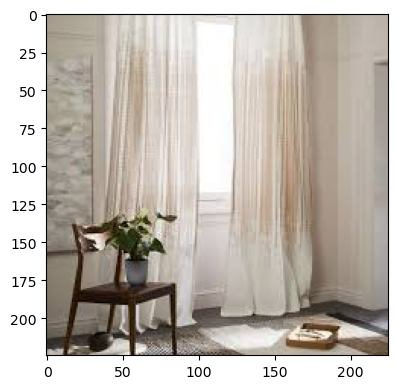

In [50]:
test_img = cv2.imread(r"C:\Users\hbsru\OneDrive\Pictures\Documents\personal\projects\waste classification\dataset\TEST\R\R_10006.jpg")
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
The image shown is Recyclable Waste


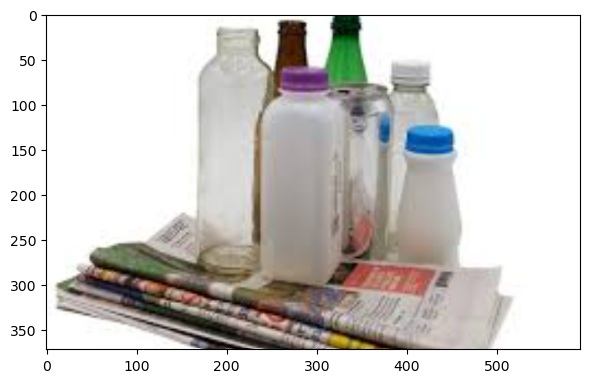

In [49]:
test_img = cv2.imread(r"C:\Users\hbsru\OneDrive\Pictures\Documents\personal\projects\waste classification\recyle image.png")
predict_fun(test_img)

In [ ]:
model.save("my_model.keras")

In [55]:
import os
print(os.listdir())  # Lists all files in the current directory


['.git', 'dataset', 'my_model.keras', 'recyle image.png', 'results', 'waste_classification.ipynb', 'Waste_classification.py']


In [56]:
from tensorflow import keras
model = keras.models.load_model("my_model.keras")
print("Model loaded successfully!")


Model loaded successfully!
